<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Regresión Logística</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sio
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as scs

<p style="text-align:justify">

<font color=red size=5>**Regresión Logística**

<font color=blue size=4>**Es un método de regresión que permite estimar la probabilidad de una variable cualitativa binaria en función de una variable cuantitativa. Una de las principales aplicaciones de la regresión logística es la de clasificación binaria, en el que las observaciones se clasifican en un grupo u otro dependiendo del valor que tome la variable empleada como predictor. Por ejemplo, clasificar a un individuo desconocido como hombre o mujer en función del tamaño de la mandíbula.**

<font color=black size=4>**Es importante tener en cuenta que, aunque la regresión logística permite clasificar, se trata de un modelo de regresión que modela el logaritmo de la probabilidad de pertenecer a cada grupo. La asignación final se hace en función de las probabilidades predichas.**

<font color=black size=4>**La existencia de una relación significativa entre una variable cualitativa con dos niveles y una variable continua se puede estudiar mediante otros test estadísticos tales como t-test o ANOVA (un ANOVA de dos grupos es equivalente al t-test). Sin embargo, la regresión logística permite además calcular la probabilidad de que la variable dependiente pertenezca a cada una de las dos categorías en función del valor que adquiera la variable independiente. Supóngase que se quiere estudiar la relación entre los niveles de colesterol y los ataques de corazón. Para ello, se mide el colesterol de un grupo de personas y durante los siguientes 20 años se monitoriza que individuos han sufrido un ataque. Un t-test entre los niveles de colesterol de las personas que han sufrido ataque vs las que no lo han sufrido permitiría contrastar la hipótesis de que el colesterol y los ataques al corazón están asociados. Si además se desea conocer la probabilidad de que una persona con un determinado nivel de colesterol sufra un infarto en los próximos 20 años, o poder conocer cuánto tiene que reducir el colesterol un paciente para no superar un 50% de probabilidad de padecer un infarto en los próximos 20 años, se tiene que recurrir a la regresión logística.**

<p style="text-align:justify"><div class="alert alert-danger">

     
### Significado "lineal"

El término "lineal" en los modelos de regresión hace referencia al hecho de que los parámetros se incorporan en la ecuación de forma lineal, no a que necesariamente la relación entre cada predictor y la variable respuesta tenga que seguir un patrón lineal.

La siguiente ecuación muestra un modelo lineal en el que el predictor $x_1$ no es lineal respecto a $y$:

$$y = \beta_0 + \beta_1x_1 + \beta_2log(x_1) + \epsilon$$

<font color=blue> **Vamos ha desarrollar un ejemplo en el que se requiere establecer un modelo que permita calcular la probabilidad de obtener una matrícula de honor al final del bachillerato en función de la nota que se ha obtenido en matemáticas. La variable matrícula está codificada como 0 si no se tiene matrícula honorífica y 1 si se tiene.** 

In [1]:
datafile="C:/Users/usuario/Documents/Analisis_Datos/pozos.xlsx" 
data = pd.read_excel(datafile, header=0, usecols='A,B')
data

NameError: name 'pd' is not defined

<font color=red> **Visualizamos para ver las diferencias entre las personas con estas dos características.** 

In [2]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Pesado", y="API",
            palette=["m", "g"],
            data=data)
sns.stripplot(x="Pesado", y="API", data=data,
              size=5, color=".4", linewidth=0)

NameError: name 'data' is not defined

<font color=red>**La librería statmodels permite realizar **Modelos de Regresión Lineal Logístico** através de la función `glm()` que incluye muchos modelos lineales, entre ellos el aquí tratanamos. La sintáxis de la función `glm()` es similar a la función `lm()`, a excepción de que debe utilizarse el argumento `family=sm.families.Binomial()` para indicarle a `python` que debe ejecutar este tipo de modelos.** 

In [7]:
model = smf.glm('Pesado ~ API', data, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

PerfectSeparationError: Perfect separation detected, results not available

In [6]:
print("Coefficeients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)

Coefficeients
Intercept   -9.793942
Nota_Mat     0.156340
dtype: float64

p-Values
Intercept    3.850061e-11
Nota_Mat     1.029399e-09
dtype: float64

Dependent variables
Mat_Hon


<font color=red>**La función `predict()` puede ser usada para predecir la probabilidad de conseguir matrícula honorífica en relación con los valores del predictor (Nota en matemáticas). En este ejemplo se utilizaron los datos con que se construyó el modelo (datos de entrenamiento).** 

In [7]:
predictions = result.predict()
predicciones=pd.DataFrame(predictions)

In [8]:
AI=pd.concat([data, predicciones], axis=1)
AI=AI.set_axis(['Honor', 'NMat', 'Prob'], axis=1, inplace=False)
AI

,Honor,NMat,Prob
0,0,41,0.032800
1,0,53,0.181250
2,0,54,0.205615
3,0,47,0.079736
4,0,57,0.292651
...,...,...,...
195,0,52,0.159193
196,0,38,0.020775
197,0,57,0.292651
198,1,58,0.326029


<font color=blue>**De esta forma podríamos predecir datos que no hubiensen participado en la construcción del modelo.** 

In [9]:
predic2 = result.predict(data['Nota_Mat'][1:20])

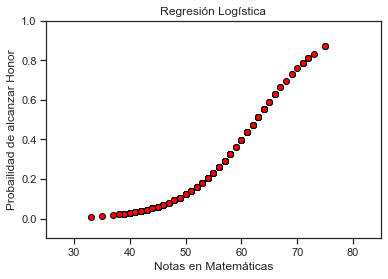

In [10]:
fig, ax= plt.subplots()
ax.scatter(AI['NMat'], AI['Prob'], color='red', edgecolors=(0, 0, 0))
ax.set_xlim(25, 85)
ax.set_ylim(-0.1, 1)
#ax.legend()
ax.set_title("Regresión Logística")
ax.set_xlabel("Notas en Matemáticas")
ax.set_ylabel("Probailidad de alcanzar Honor")
plt.show()
#fig.savefig("ccal.pdf",bbox_inches='tight')

<font color=red>**Dada estas predicciones podemos usar la función `confusion\_matrix()` para obtener la matriz de confusión para determinar cuantas observaciones han sido correcta o incorrectamente clasificados. Esta función hace parte de la librería de funciones de la librería `sklearn`.**

In [11]:
predicciones_nominal = [ 0 if x < 0.5 else 1 for x in predictions]

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
CM = confusion_matrix(AI["Honor"], predicciones_nominal)
CM

array([[140,  11],
       [ 27,  22]], dtype=int64)

<font color=red>**Los elementos de la diagonal de la matriz de confusión indica la correcta predicción de las categorías ´0´ y ´1´ respectivamente. Los elementos por fuera de la diagonal correspondera a las predicciones incorrectas. Este modelo, predice correctamente $140$ estudiantes que no alcanzaron la matrícula honorífica y $22$ que si alcazaron, para un total de $140 + 22 = 166$ predicciones correctas de $200$. La librería ´sklearn´, entre otras muchas cosas permite determinar la calidad de modelo usando la función `classification\_report()`.**

In [13]:
print(classification_report(AI["Honor"], 
                            predicciones_nominal, 
                            digits = 3))

              precision    recall  f1-score   support

           0      0.838     0.927     0.881       151
           1      0.667     0.449     0.537        49

    accuracy                          0.810       200
   macro avg      0.752     0.688     0.709       200
weighted avg      0.796     0.810     0.796       200



<font color=blue size=6>**Regresión Logistica Multiple o Multivariada**

<font color=gree size=4>La libreria statmodel permite realizar regresión logística múltiple. En este ejemplo se supondra que existe relación entre el hecho de que un estudiante asista a clases de repaso de lectura (sí = 1, no = 0), la nota que obtiene en un examen de lectura estándar (realizado antes de iniciar las clases de repaso) y el sexo (hombre = 1, mujer = 0). Se quiere generar un modelo en el que a partir de las variables puntuación del examen y sexo, prediga la probabilidad de que el estudiante tenga que asistir a clases de repaso.

In [14]:
datafile1="C:/Users/usuario/Documents/Analisis_Datos/Datos_Lectura_genero.xlsx" 
data2 = pd.read_excel(datafile1, header=0, usecols='B,C,D')
data2

,sexo,examen_lectura,clases_repaso
0,hombre,91.0,0
1,hombre,77.5,0
2,mujer,52.5,0
3,mujer,54.0,0
4,mujer,53.5,0
...,...,...,...
184,mujer,47.5,1
185,hombre,50.0,1
186,hombre,47.0,1
187,hombre,71.0,1


<font color=blue> **Visualizamos los datos.** 

<AxesSubplot:xlabel='clases_repaso', ylabel='examen_lectura'>

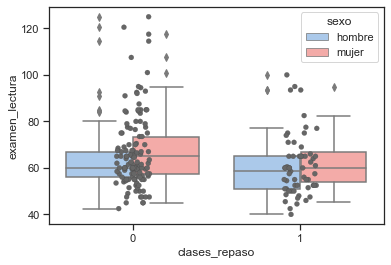

In [15]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="clases_repaso", y="examen_lectura", hue="sexo",
            palette=["b", "r"],
            data=data2)
sns.stripplot(x="clases_repaso", y="examen_lectura", data=data2,
              size=5, color=".4", linewidth=0.2)

<font color=blue> **Generamos el modelo usando la función *gml()* y dos predictores.** 

In [16]:
model2 = smf.glm('clases_repaso ~ examen_lectura + sexo', data2, family=sm.families.Binomial())
result2 = model2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          clases_repaso   No. Observations:                  189
Model:                            GLM   Df Residuals:                      186
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -112.32
Date:                Tue, 20 Apr 2021   Deviance:                       224.64
Time:                        11:02:17   Pearson chi2:                     189.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1836      0.786      1.

<font color=blue> **Parámetros individualizados.** 

In [17]:
print("Coefficeients")
print(result2.params)
print()
print("p-Values")
print(result2.pvalues)
print()
print("Dependent variables")
print(result2.model.endog_names)

Coefficeients
Intercept         1.183647
sexo[T.mujer]    -0.647487
examen_lectura   -0.026171
dtype: float64

p-Values
Intercept         0.131889
sexo[T.mujer]     0.046236
examen_lectura    0.032418
dtype: float64

Dependent variables
clases_repaso


<font color=blue> **Predicciones expresadas como probabilidad** 

In [18]:
predictions = result2.predict()
predicciones2=pd.DataFrame(predictions)

<font color=blue> **Construcción de una tabla de datos en la que se incluye la probailidad** 

In [19]:
AI2=pd.concat([data2, predicciones2], axis=1)
AI2=AI2.set_axis(['sexo', 'examen_lectura', 'clases_repaso', 'Prob'], axis=1, inplace=False)
AI2

,sexo,examen_lectura,clases_repaso,Prob
0,hombre,91.0,0,0.231838
1,hombre,77.5,0,0.300558
2,mujer,52.5,0,0.301989
3,mujer,54.0,0,0.293779
4,mujer,53.5,0,0.296501
...,...,...,...,...
184,mujer,47.5,1,0.330265
185,hombre,50.0,1,0.468809
186,hombre,47.0,1,0.488399
187,hombre,71.0,1,0.337483


<font color=blue> **Separación de los datos para *mujer* y *hombre*, el objetivo de esta etapa es solo para visualizar el resultado** 

In [20]:
M = AI2[AI2["sexo"]=='mujer']
H = AI2[AI2["sexo"]=='hombre']
M.sort_index(axis=0, ascending = True, inplace = True)
M

,sexo,examen_lectura,clases_repaso,Prob
2,mujer,52.5,0,0.301989
3,mujer,54.0,0,0.293779
4,mujer,53.5,0,0.296501
6,mujer,59.0,0,0.267380
8,mujer,61.5,0,0.254760
...,...,...,...,...
177,mujer,60.0,1,0.262284
178,mujer,55.0,1,0.288379
182,mujer,95.0,1,0.124539
184,mujer,47.5,1,0.330265


<font color=blue> **Visualizamos los resultados.** 

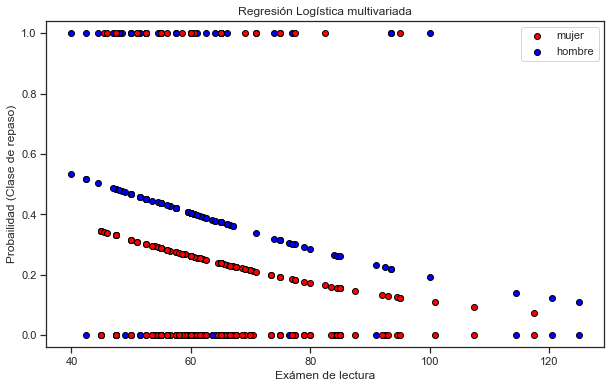

In [21]:
fig, ax= plt.subplots(figsize=(10, 6))
ax.scatter(M['examen_lectura'], M['Prob'], color='red', edgecolors=(0, 0, 0), label='mujer')
ax.scatter(H['examen_lectura'], H['Prob'], color='blue', edgecolors=(0, 0, 0), label='hombre')
ax.scatter(H['examen_lectura'], H['clases_repaso'], color='blue', edgecolors=(0, 0, 0))
ax.scatter(M['examen_lectura'], M['clases_repaso'], color='red', edgecolors=(0, 0, 0))
#ax.set_xlim(25, 85)
ax.set_ylim(-0.04, 1.04)
ax.legend()
ax.set_title("Regresión Logística multivariada")
ax.set_xlabel("Exámen de lectura")
ax.set_ylabel("Probailidad (Clase de repaso)")
plt.show()
#fig.savefig("ccal.pdf",bbox_inches='tight')

<font color=blue> **Se escoge un umbral de probailidad de $0.5$, de tal forma que se considera que si es mayor que ese umbral se toma como $1$ y si es menor como $0$ de la variable a predecir.** 

In [150]:
predicciones_nominal2 = [ 0 if x < 0.5 else 1 for x in predictions]

<font color=blue> **Utilizamos la librería *sklearn* para obtener la matriz de confusión y evaluar el modelo con las funciones ***confusion_matrix*** y ***classification_report***.** 

In [156]:
from sklearn.metrics import confusion_matrix, classification_report
CM2 = confusion_matrix(AI2["clases_repaso"], predicciones_nominal2)
CM2

array([[129,   1],
       [ 56,   3]], dtype=int64)

In [157]:
print(classification_report(AI2["clases_repaso"], 
                            predicciones_nominal2, 
                            digits = 3))

              precision    recall  f1-score   support

           0      0.697     0.992     0.819       130
           1      0.750     0.051     0.095        59

    accuracy                          0.698       189
   macro avg      0.724     0.522     0.457       189
weighted avg      0.714     0.698     0.593       189

